In [234]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

color_pal =  sns.color_palette()

dataroot = '../WaterLevelPredction_SelectingModel//Data/'

In [235]:
df=pd.read_csv(dataroot + 'WaterLevelData_ver3.5.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5105 non-null   int64  
 1   month          5105 non-null   int64  
 2   day            5105 non-null   int64  
 3   water_level    5105 non-null   float64
 4   hour           5105 non-null   int64  
 5   precipitation  762 non-null    float64
 6   sluice_status  5105 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 279.3+ KB


In [236]:
df.precipitation.fillna(0, inplace=True)

In [237]:
le = LabelEncoder()
df['sluice_status'] = le.fit_transform(df['sluice_status'])

In [238]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day','hour']])
df.index = pd.to_datetime(df.datetime)

In [239]:
df.tail(10)

,year,month,day,water_level,hour,precipitation,sluice_status,datetime
datetime,,,,,,,,
2019-12-27 07:00:00,2019,12,27,475.18,7,0.0,0,2019-12-27 07:00:00
2019-12-27 19:00:00,2019,12,27,475.18,19,0.0,0,2019-12-27 19:00:00
2019-12-28 07:00:00,2019,12,28,475.18,7,0.0,0,2019-12-28 07:00:00
2019-12-28 19:00:00,2019,12,28,475.18,19,0.0,0,2019-12-28 19:00:00
2019-12-29 07:00:00,2019,12,29,475.18,7,0.0,0,2019-12-29 07:00:00
2019-12-29 19:00:00,2019,12,29,475.18,19,0.0,0,2019-12-29 19:00:00
2019-12-30 07:00:00,2019,12,30,475.18,7,0.0,0,2019-12-30 07:00:00
2019-12-30 19:00:00,2019,12,30,475.17,19,0.0,0,2019-12-30 19:00:00
2019-12-31 07:00:00,2019,12,31,475.17,7,0.0,0,2019-12-31 07:00:00


In [240]:
df.to_pickle(dataroot + 'finaldata.pkl')

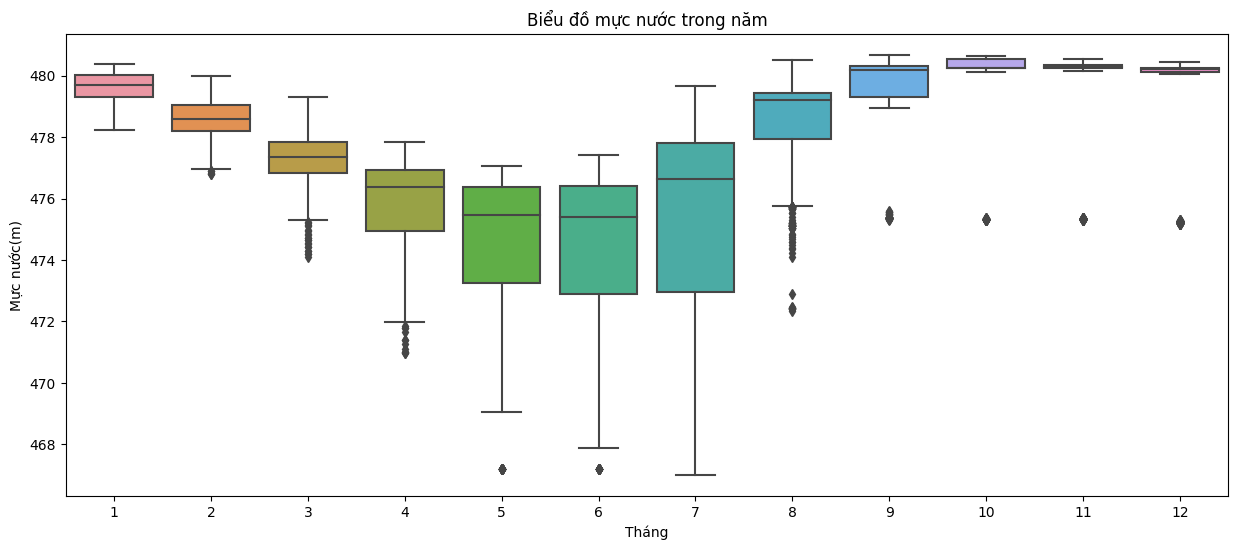

In [241]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='water_level', data=df)
plt.title('Biểu đồ mực nước trong năm')
plt.xlabel('Tháng')
plt.ylabel('Mực nước(m)')
plt.show()


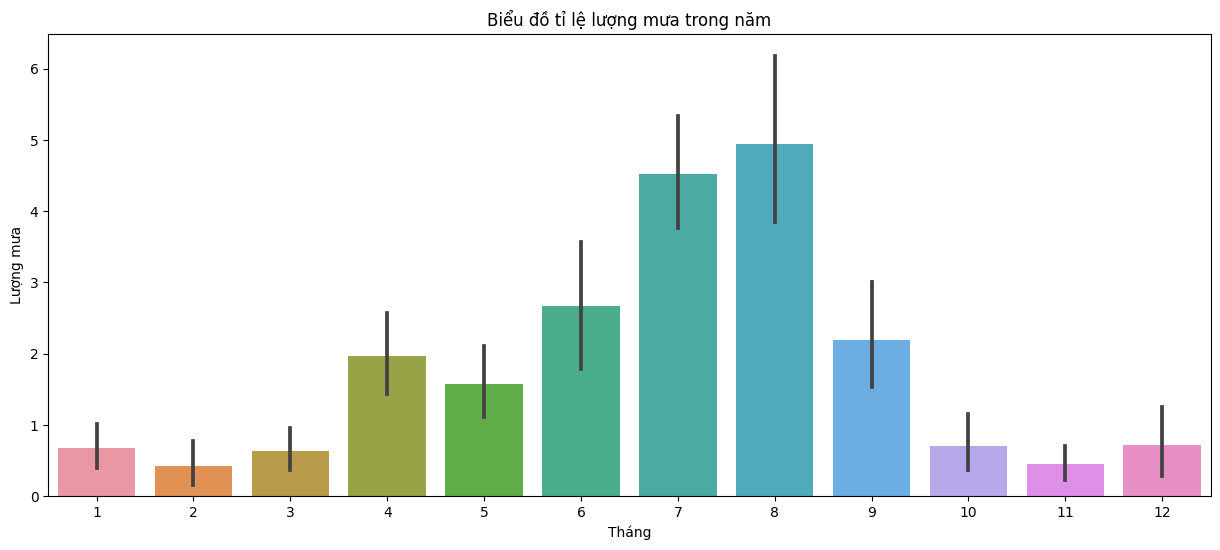

In [242]:
plt.figure(figsize=(15, 6))
sns.barplot(x='month', y='precipitation', data=df)
plt.title('Biểu đồ tỉ lệ lượng mưa trong năm')
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa')
plt.show()

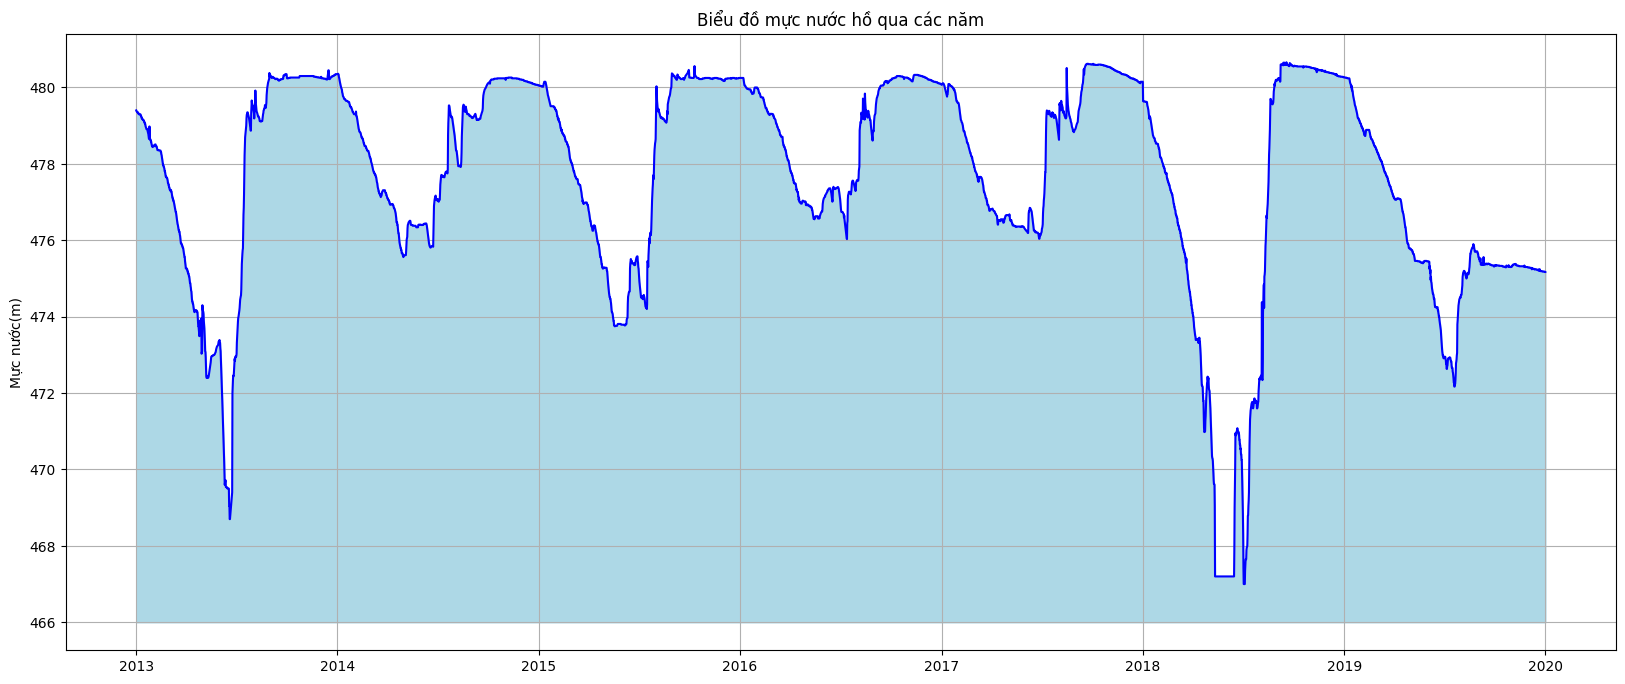

In [243]:
plt.figure(figsize=(20,8))

plt.title('Biểu đồ mực nước hồ qua các năm')

plt.plot(df['water_level'], color='blue')
plt.fill_between(df.index,466,df['water_level'],color='lightblue')

plt.ylabel('Mực nước(m)')

plt.grid()
plt.show()

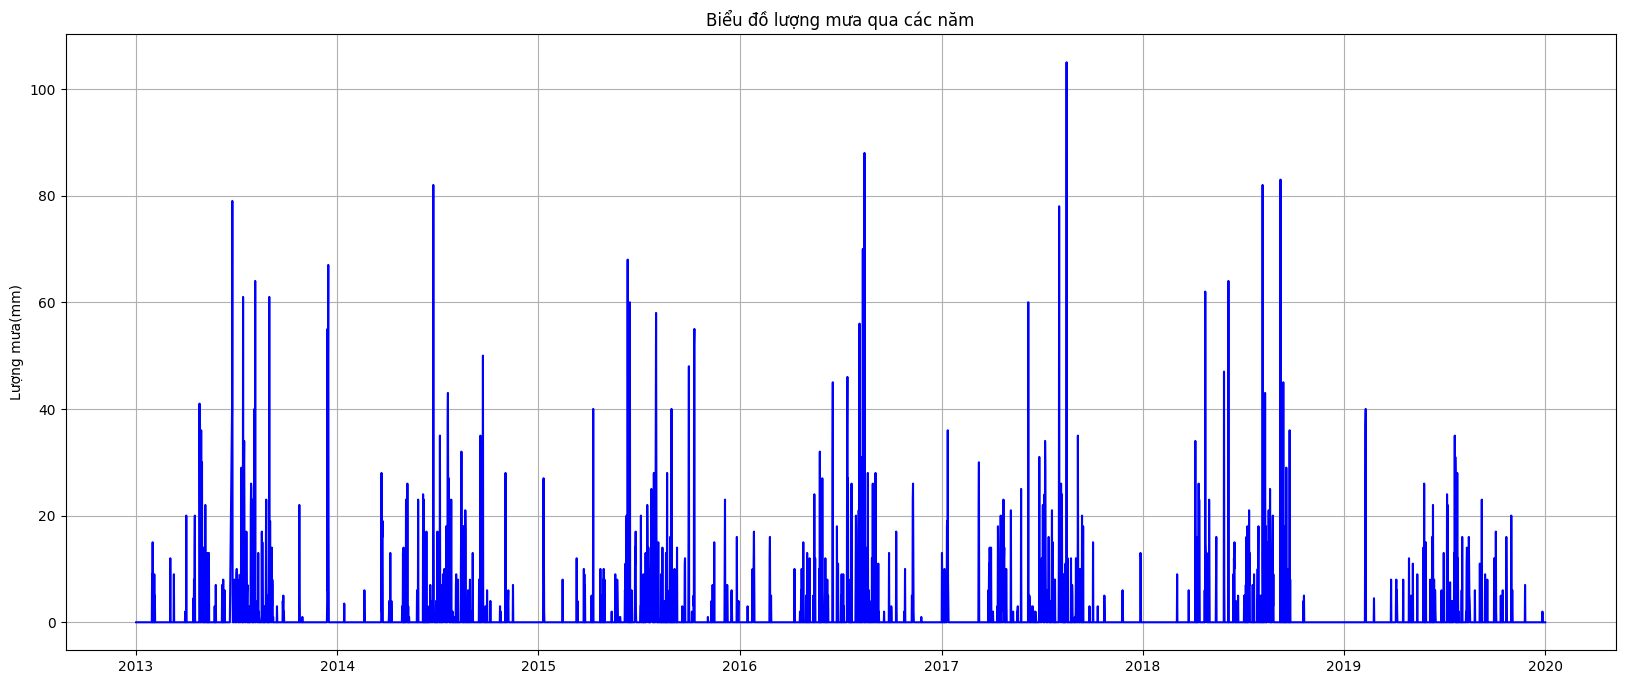

In [244]:
plt.figure(figsize=(20,8))

plt.title('Biểu đồ lượng mưa qua các năm')

plt.plot(df['precipitation'], color='blue')

plt.ylabel('Lượng mưa(mm)')

plt.grid()
plt.show()

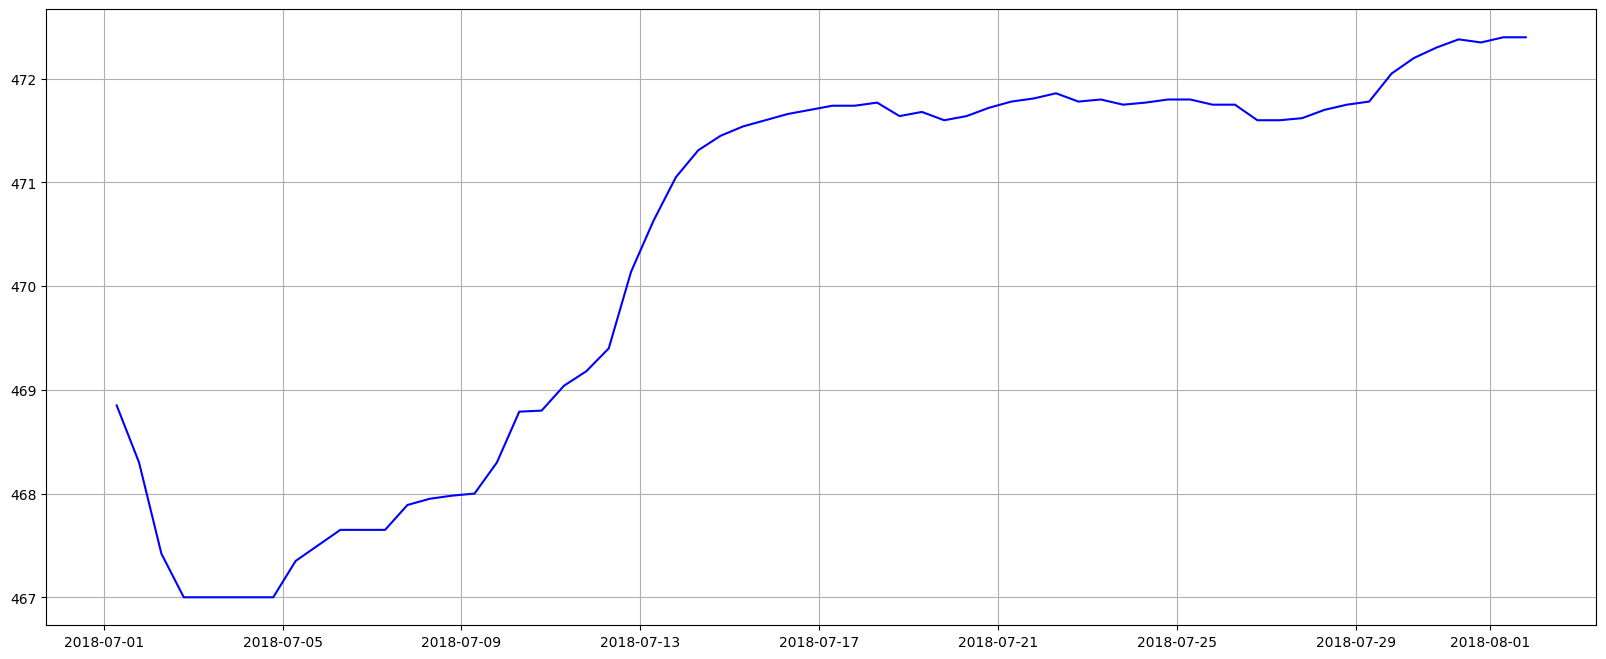

In [245]:
plt.figure(figsize=(20,8))
df = df.loc['07-01-2018':'08-01-2018']

plt.plot(df['water_level'], color='blue')

plt.grid()
plt.show()